In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import plotly.express as px
#import plotly.graph_objects as go

In [5]:
df = pd.read_excel("train_4.xlsx")

In [208]:
#df['SAYAC_YAPIM_YILI'] = df['SAYAC_YAPIM_YILI'].astype('datetime64[ns]')
df.head()

REF_TARIH  TUKETIM_M1  TUKETIM_M2  TUKETIM_M3  TUKETIM_M4  TUKETIM_M5  \
0 2020-03-31   54.067286  260.483048  275.618048  273.467499  281.655063   
1 2020-03-31  125.413387  227.864889  253.651891  230.289027  241.382306   
2 2020-03-31  308.273107  386.164464  392.016065  238.200398  163.968966   
3 2020-03-31   23.105143   49.197286   64.653696   73.807875   31.418710   
4 2020-03-31   36.016793   48.795995   50.209868   50.969201   49.746943   

   TUKETIM_M6  TUKETIM_M7  TUKETIM_M8  TUKETIM_M9  ...        TESISAT_TIPI  \
0  352.713057  415.387382  506.970118  536.242000  ...              Mesken   
1  248.334700  217.821800  249.203886  246.356225  ...              Mesken   
2  162.782897  187.088937  212.920402  204.618086  ...              Mesken   
3   31.834563   24.261624   27.079161   26.952110  ...  Ticarethane-Sanayi   
4   89.461700  328.368786  469.163521  432.848994  ...              Mesken   

   SAYAC_BASLANGIC_TARIHI  SAYAC_MARKA  SAYAC_MODEL  SAYAC_MALZEME_ID  \
0              2016-10-18         LUNA         LUN1        80000100.0   
1              2016-09-25   ELEKTROMED     EC058MBW        80000730.0   
2              2016-10-11   ELEKTROMED     EC15ATBW        80000730.0   
3              2016-05-24         LUNA        LUN10        80000710.0   
4              2018-05-30         LUNA      LUN10-B        80001000.0   

   SAYAC_OLCUM_TURU  SAYAC_FAZ_N  SAYAC_TAKILMA_TARIHI  SAYAC_YAPIM_YILI  \
0             Aktif     Monofaze            2016-10-18            2012.0   
1             Aktif     Monofaze            2016-09-25            2015.0   
2             Aktif      Trifaze            2016-10-11            2016.0   
3             Aktif     Monofaze            2016-05-24            2016.0   
4             Aktif     Monofaze            2018-05-30            2017.0   

   NK_FLAG  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 50 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   REF_TARIH               15000 non-null  datetime64[ns]
 1   TUKETIM_M1              15000 non-null  float64       
 2   TUKETIM_M2              15000 non-null  float64       
 3   TUKETIM_M3              15000 non-null  float64       
 4   TUKETIM_M4              15000 non-null  float64       
 5   TUKETIM_M5              15000 non-null  float64       
 6   TUKETIM_M6              15000 non-null  float64       
 7   TUKETIM_M7              15000 non-null  float64       
 8   TUKETIM_M8              15000 non-null  float64       
 9   TUKETIM_M9              15000 non-null  float64       
 10  TUKETIM_M10             15000 non-null  float64       
 11  TUKETIM_M11             15000 non-null  float64       
 12  TUKETIM_M12             15000 non-null  float6

### TUKETIM_M24 değeri dolu ise tüketici 24 aydır abonedir. bu yüzden tuketim kolunundaki nan değerlere 0 yazabiliriz.

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
DEMAND_M12               3175  0.211667
DEMAND_M10               2758  0.183867
DEMAND_M8                2757  0.183800
DEMAND_M6                2582  0.172133
DEMAND_M2                2388  0.159200
DEMAND_M4                2369  0.157933
DEMAND_M11               1308  0.087200
DEMAND_M9                1234  0.082267
DEMAND_M7                1022  0.068133
DEMAND_M5                 945  0.063000
DEMAND_M3                 783  0.052200
TUKETIM_M24               640  0.042667
TUKETIM_M23               544  0.036267
TUKETIM_M22               485  0.032333
TUKETIM_M21               432  0.028800
TUKETIM_M20               392  0.026133
TUKETIM_M19               336  0.022400
TUKETIM_M18               293  0.019533
TUKETIM_M17               254  0.016933
TUKETIM_M16               200  0.013333
TUKETIM_M15               155  0.010333
TUKETIM_M14               101  0.006733
DEMAND_M1                  71  0.004733
SAYAC_MARKA                50  0.003333
SAYAC_MODEL                50  0.003333
SAYAC_MALZEME_ID           50  0.003333
SAYAC_OLCUM_TURU           50  0.003333
SAYAC_FAZ_N                50  0.003333
SAYAC_TAKILMA_TARIHI       50  0.003333
SAYAC_YAPIM_YILI           50  0.003333
SAYAC_BASLANGIC_TARIHI     50  0.003333
TUKETIM_M13                44  0.002933
SOKAK_RISK_SKORU            0  0.000000
MAHALLE_RISK_SKORU          0  0.000000
SOB_RISK_SKORU              0  0.000000
TESISAT_TIPI                0  0.000000
REF_TARIH                   0  0.000000
TUKETIM_M1                  0  0.000000
TUKETIM_M12                 0  0.000000
TUKETIM_M11                 0  0.000000
TUKETIM_M10                 0  0.000000
TUKETIM_M9                  0  0.000000
TUKETIM_M8                  0  0.000000
TUKETIM_M7                  0  0.000000
TUKETIM_M6                  0  0.000000
TUKETIM_M5                  0  0.000000
TUKETIM_M4                  0  0.000000
TUKETIM_M3                  0  0.000000
TUKETIM_M2                  0  0.000000
NK_FLAG                     0  0.000000

C:\Users\Furkan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

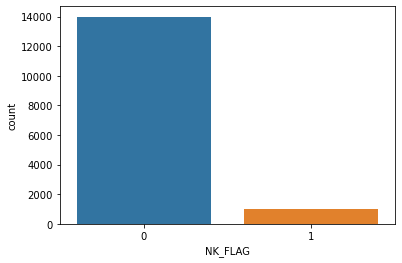

In [7]:
sns.countplot(df['NK_FLAG'])

In [8]:
for col in df.columns:
        print(str(col) +" : " + str(df[col].nunique()))

REF_TARIH : 515
TUKETIM_M1 : 14164
TUKETIM_M2 : 14317
TUKETIM_M3 : 14380
TUKETIM_M4 : 14382
TUKETIM_M5 : 14474
TUKETIM_M6 : 14472
TUKETIM_M7 : 14523
TUKETIM_M8 : 14489
TUKETIM_M9 : 14481
TUKETIM_M10 : 14454
TUKETIM_M11 : 14456
TUKETIM_M12 : 14382
TUKETIM_M13 : 14385
TUKETIM_M14 : 14266
TUKETIM_M15 : 14269
TUKETIM_M16 : 14199
TUKETIM_M17 : 14223
TUKETIM_M18 : 14219
TUKETIM_M19 : 14240
TUKETIM_M20 : 14131
TUKETIM_M21 : 14095
TUKETIM_M22 : 14031
TUKETIM_M23 : 13975
TUKETIM_M24 : 13831
DEMAND_M1 : 3016
DEMAND_M2 : 2948
DEMAND_M3 : 3074
DEMAND_M4 : 2810
DEMAND_M5 : 2746
DEMAND_M6 : 2326
DEMAND_M7 : 2485
DEMAND_M8 : 2350
DEMAND_M9 : 2468
DEMAND_M10 : 2433
DEMAND_M11 : 2708
DEMAND_M12 : 2707
SOB_RISK_SKORU : 2879
SOKAK_RISK_SKORU : 1377
MAHALLE_RISK_SKORU : 1426
TESISAT_TIPI : 2
SAYAC_BASLANGIC_TARIHI : 1556
SAYAC_MARKA : 9
SAYAC_MODEL : 76
SAYAC_MALZEME_ID : 34
SAYAC_OLCUM_TURU : 2
SAYAC_FAZ_N : 2
SAYAC_TAKILMA_TARIHI : 1556
SAYAC_YAPIM_YILI : 14
NK_FLAG : 2


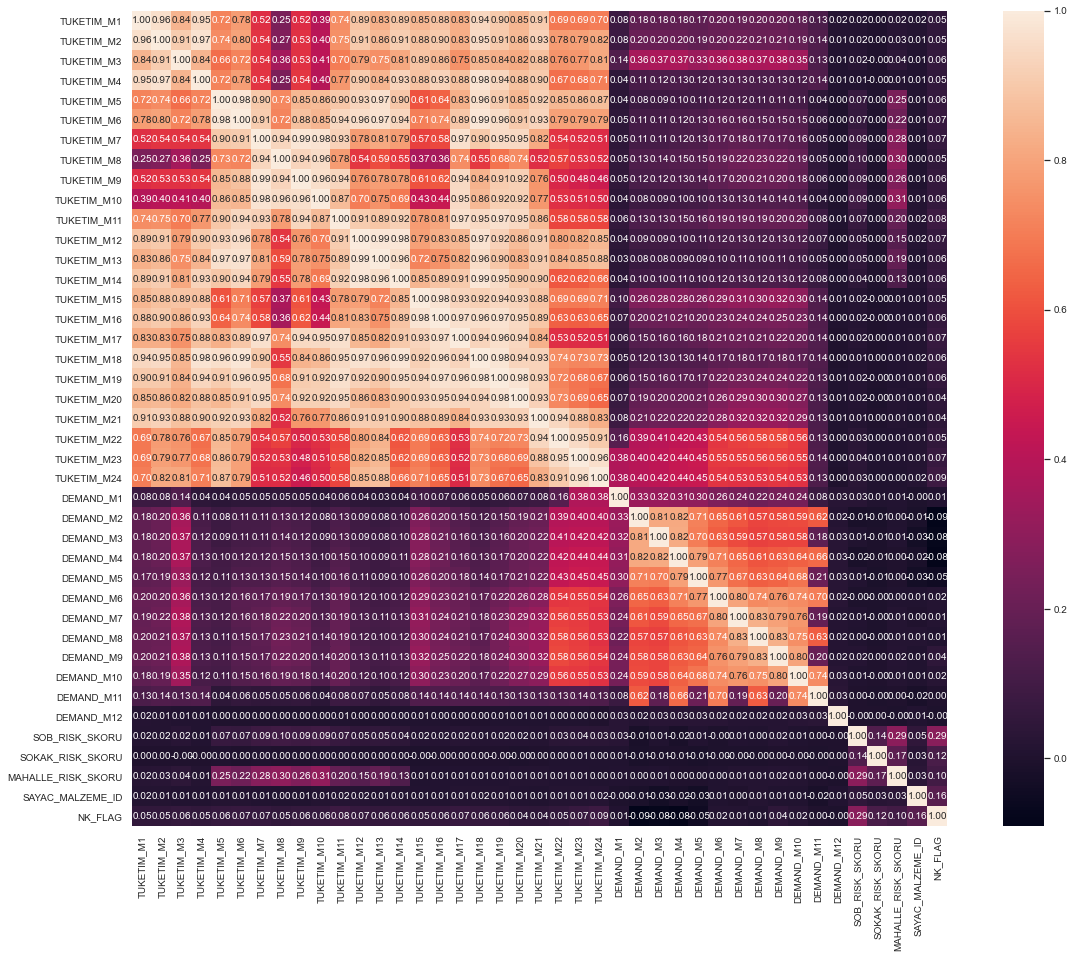

In [10]:
corr = df.corr()
k = 20 #number of variables for heatmap
cols = corr.nlargest(k, 'NK_FLAG')['NK_FLAG'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(20, 15))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [11]:
numeric_df = df.select_dtypes(include=np.number)

In [12]:
numeric_df.describe()

TUKETIM_M1    TUKETIM_M2    TUKETIM_M3     TUKETIM_M4     TUKETIM_M5  \
count  15000.000000  15000.000000  15000.000000   15000.000000   15000.000000   
mean      96.208479    205.978455    223.982149     217.158467     183.984799   
std      423.739447    806.797729    562.430605    1388.820828    1311.605920   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       18.663720     67.464279     72.497774      71.253761      70.489054   
50%       57.967004    147.897623    156.901631     152.988106     136.929436   
75%      119.764778    244.215963    267.343281     251.375305     203.995790   
max    47318.985000  90851.355000  47803.770000  162381.240000  111955.470968   

         TUKETIM_M6     TUKETIM_M7     TUKETIM_M8    TUKETIM_M9  \
count  15000.000000   15000.000000   15000.000000  15000.000000   
mean     184.405282     215.505007     248.644492    232.900504   
std     1063.798858    1162.260886    1100.215516   1112.950045   
min        0.000000       0.000000       0.000000      0.000000   
25%       72.638329      78.729780      81.960615     77.956021   
50%      138.537125     151.135455     167.395119    156.945536   
75%      201.954775     238.281348     288.195682    261.602692   
max    95467.680000  110822.519806  112852.579355  98479.082839   

         TUKETIM_M10  ...     DEMAND_M8     DEMAND_M9    DEMAND_M10  \
count   15000.000000  ...  12243.000000  13766.000000  12242.000000   
mean      205.188164  ...      2.434009      2.298214      2.584867   
std      1337.520990  ...      2.084839      1.916677      2.020813   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%        74.530854  ...      1.084000      1.044000      1.480000   
50%       144.954876  ...      2.268000      2.160000      2.372000   
75%       224.807583  ...      3.356000      3.120000      3.384000   
max    142768.472000  ...     56.088000     48.259000     43.868000   

         DEMAND_M11    DEMAND_M12  SOB_RISK_SKORU  SOKAK_RISK_SKORU  \
count  13692.000000  11825.000000    15000.000000      15000.000000   
mean       2.652326      4.903145        0.012733          0.015385   
std        6.961637    204.339999        0.026829          0.135404   
min        0.000000      0.000000        0.000000          0.000000   
25%        1.376000      1.592000        0.001531          0.000000   
50%        2.304000      2.624000        0.005666          0.000000   
75%        3.380000      4.096000        0.013746          0.010340   
max      777.215000  22222.000000        1.127251         14.264706   

       MAHALLE_RISK_SKORU  SAYAC_MALZEME_ID       NK_FLAG  
count        15000.000000      1.495000e+04  15000.000000  
mean             0.015423      8.000066e+07      0.068000  
std              0.062241      3.202995e+02      0.251754  
min              0.000000      8.000000e+07      0.000000  
25%              0.002672      8.000071e+07      0.000000  
50%              0.006691      8.000073e+07      0.000000  
75%              0.013659      8.000096e+07      0.000000  
max              4.208696      8.000103e+07      1.000000  

[8 rows x 41 columns]

***

In [14]:
(df.SAYAC_BASLANGIC_TARIHI == df.SAYAC_TAKILMA_TARIHI).sum()


14950

In [15]:
df[df.SAYAC_BASLANGIC_TARIHI == df.SAYAC_TAKILMA_TARIHI].NK_FLAG.value_counts()

0    13949
1     1001
Name: NK_FLAG, dtype: int64

In [16]:
df[df.SAYAC_BASLANGIC_TARIHI != df.SAYAC_TAKILMA_TARIHI].NK_FLAG.value_counts()

0    31
1    19
Name: NK_FLAG, dtype: int64

In [211]:
for i in range(df.shape[0]+1) :
    df.loc[i, "id"] = i
    
df['id'] = df['id'].astype('int')

In [212]:
eksik_df = df[df.SAYAC_BASLANGIC_TARIHI != df.SAYAC_TAKILMA_TARIHI]
eksik_df

REF_TARIH    TUKETIM_M1    TUKETIM_M2    TUKETIM_M3     TUKETIM_M4  \
318   2019-12-17    320.324594    447.463692    418.800964     453.369681   
536   2019-12-04    220.838667    296.138589    277.749707     343.663537   
553   2020-03-31     10.437607     15.134530     16.178291      16.178291   
565   2020-03-31     23.999100     57.092367     34.385791      40.706372   
855   2019-10-08    192.211636    665.189364    651.472667     635.972133   
914   2020-03-31    224.643000    276.871000    239.303000      86.076000   
2374  2019-10-20     67.407931    690.341069    824.446806     831.629474   
2589  2020-03-31    123.170517    366.163676    479.047161     369.084793   
3095  2020-03-31     22.646483    158.515374    139.959202     165.797480   
3310  2020-03-31    225.759724    293.111276    200.961805     176.685437   
3563  2020-03-31      9.589263     10.654737      8.428556       6.443555   
4557  2020-03-31    245.830286    516.764456    605.013591     557.555200   
4771  2018-11-14  47318.985000  90851.355000  47803.770000  162381.240000   
4909  2020-03-31      1.860214      7.415786      1.977691       0.087927   
5147  2020-03-31     20.942368    121.465737    127.215158     138.749063   
5178  2020-03-31    141.915586    167.799059    178.441855     179.468318   
5373  2020-03-31    858.319576   1039.897540   1109.000385    1122.830786   
6266  2019-07-17     53.637926    102.051103    270.437437     292.694120   
6627  2020-03-31      2.205500     32.515655     39.722935      39.722935   
7004  2020-03-31    642.656429   1037.325271    631.033633     911.598333   
7140  2020-03-31    287.739069   1594.590212   1402.465204     433.741955   
7221  2019-05-29      0.270000   7797.745385  12237.431888   12471.707927   
7298  2019-03-06   5944.914000  17011.266000  29395.305000   25365.899000   
7393  2019-08-22    358.080941    828.501297    879.127685     960.493899   
7782  2020-03-31   1222.314968   1513.478872   1616.579069    1641.652555   
7836  2020-03-31     16.309400     83.657160    114.201275     114.201275   
8408  2020-03-31    174.225231    555.623569    677.671200     388.452000   
8532  2019-12-04      0.951613      2.854839      2.941156       2.919536   
9430  2020-03-31     40.333714    199.743576    226.861742     207.895168   
9458  2018-02-06     35.846500    107.504167    258.476190     506.003525   
10106 2019-02-13    136.599310    921.404690    977.642233     190.987767   
10144 2020-03-31    134.915854    134.915854     98.938293       0.000000   
10219 2020-03-31  10947.406000  11678.093000  13121.282000   11210.875000   
10368 2020-03-31    173.842000    252.404000    248.710000     219.293000   
11240 2020-03-31     21.621286    321.448746    408.400582     286.807757   
11422 2020-03-31   2291.160931   4709.703605   5099.352724    4337.800741   
11537 2018-10-17      0.000000      0.000000      0.000000     132.764444   
11698 2020-03-31      0.036305      0.080390     15.680418      27.607258   
11852 2019-01-17   1546.725857   1660.427810   1752.302849    2460.680095   
12337 2019-09-04    674.114286   2505.390714   1938.082000    1396.244290   
12405 2020-03-31      0.000000      0.000000      0.000000       0.000000   
12726 2019-07-17   1685.319000   1586.353652   1397.448624    1539.276438   
13236 2020-01-21   2341.764000   1821.012000   1259.264000   25853.962581   
13361 2019-07-25   2107.200000   5508.480000   5851.560000    2669.280000   
13764 2019-01-09      0.000000     24.064444    234.153749     649.596921   
13838 2020-03-31   1288.789000   1380.529125    877.253175     782.461465   
14239 2020-03-31    154.565167     58.022102     56.326218      54.509244   
14623 2020-03-31    112.694625    349.453616    417.279559     345.792000   
14946 2020-03-31      5.565636    167.365571    171.215231     109.850870   
14979 2020-03-31    403.950000    436.802000    961.877194     642.060119   
15000        NaT           NaN           NaN           NaN            NaN   

  

In [20]:
df.head()

REF_TARIH  TUKETIM_M1  TUKETIM_M2  TUKETIM_M3  TUKETIM_M4  TUKETIM_M5  \
0 2020-03-31   54.067286  260.483048  275.618048  273.467499  281.655063   
1 2020-03-31  125.413387  227.864889  253.651891  230.289027  241.382306   
2 2020-03-31  308.273107  386.164464  392.016065  238.200398  163.968966   
3 2020-03-31   23.105143   49.197286   64.653696   73.807875   31.418710   
4 2020-03-31   36.016793   48.795995   50.209868   50.969201   49.746943   

   TUKETIM_M6  TUKETIM_M7  TUKETIM_M8  TUKETIM_M9  ...  \
0  352.713057  415.387382  506.970118  536.242000  ...   
1  248.334700  217.821800  249.203886  246.356225  ...   
2  162.782897  187.088937  212.920402  204.618086  ...   
3   31.834563   24.261624   27.079161   26.952110  ...   
4   89.461700  328.368786  469.163521  432.848994  ...   

   SAYAC_BASLANGIC_TARIHI  SAYAC_MARKA  SAYAC_MODEL  SAYAC_MALZEME_ID  \
0              2016-10-18         LUNA         LUN1        80000100.0   
1              2016-09-25   ELEKTROMED     EC058MBW        80000730.0   
2              2016-10-11   ELEKTROMED     EC15ATBW        80000730.0   
3              2016-05-24         LUNA        LUN10        80000710.0   
4              2018-05-30         LUNA      LUN10-B        80001000.0   

   SAYAC_OLCUM_TURU  SAYAC_FAZ_N  SAYAC_TAKILMA_TARIHI  \
0             Aktif     Monofaze            2016-10-18   
1             Aktif     Monofaze            2016-09-25   
2             Aktif      Trifaze            2016-10-11   
3             Aktif     Monofaze            2016-05-24   
4             Aktif     Monofaze            2018-05-30   

               SAYAC_YAPIM_YILI  NK_FLAG  id  
0 1970-01-01 00:00:00.000002012      0.0   0  
1 1970-01-01 00:00:00.000002015      0.0   1  
2 1970-01-01 00:00:00.000002016      0.0   2  
3 1970-01-01 00:00:00.000002016      0.0   3  
4 1970-01-01 00:00:00.000002017      0.0   4  

[5 rows x 51 columns]

**Sayaç takılma tarihi ile sayaç başlangıç tarihleri eksik olan 50 adet satır var. Bu 50 kayıtın 19 tanesi(%38) kaçakçı olarak tespit edildi.Burada bu iki kolon yerine bir kolon oluşturulup iki tarih aynı olanlara AYNI değeri bu iki tarih eksik olanlara EKSIK değeri verilecek.**

***

In [21]:
def vis_data(df, x, y = 'NK_FLAG', graph = 'countplot'):
    if graph == 'hist':
        fig = px.histogram(df, x = x)
        fig.update_layout(title = 'Distribution of {x}'.format(x = x))
        fig.show()
    elif graph == 'bar':
      fig = px.bar(df, x = x, y = y)
      fig.update_layout(title = '{x} vs. {y}'.format(x = x, y = y))
      fig.show()
    elif graph == 'countplot':
      a = df.groupby([x,y]).count()
      a.reset_index(inplace = True)
      no_fraud = a[a['NK_FLAG'] == 0]
      yes_fraud = a[a['NK_FLAG'] == 1]
      trace1 = go.Bar(x = no_fraud[x], y = no_fraud['id'], name = 'No Fraud')
      trace2 = go.Bar(x = yes_fraud[x], y = yes_fraud['id'], name = 'Fraud')
      fig = go.Figure(data = [trace1, trace2])
      fig.update_layout(title = '{x} vs. {y}'.format(x=x, y = y))
      fig.update_layout(barmode = 'group')
      fig.show()

In [213]:
vis_data(eksik_df, 'TESISAT_TIPI') # 50 tane tarihsiz satır.

In [23]:
vis_data(df, 'TESISAT_TIPI')

**Mesken tipi tesisatlarda kaçak kullanım oranı %6.3 çıkarken Ticarethane-Sanayi tipi tesisatlarda kaçak kullanım oranı %11.1 çıkmıştır.**

In [24]:
df['SAYAC_MARKA'] = df['SAYAC_MARKA'].fillna("EKSIK")
umbrealla = df['SAYAC_MARKA'].unique()

In [25]:
for umb in umbrealla:
  if (umb != 'ELEKTROMED') & (umb != 'LUNA'):
    df['SAYAC_MARKA'] = df['SAYAC_MARKA'].str.replace(umb, 'OTHERS')

df['SAYAC_MARKA'].unique()

array(['LUNA', 'ELEKTROMED', 'OTHERS'], dtype=object)

In [26]:
vis_data(df, 'SAYAC_MARKA')

**%5.9 , %0 , %3.7 , %2.7 , %3.2 , %10,5 , %2.8 , %0 , %4.5**

**SAYAC_MARKA kolonu ELEKTROMED , LUNA ve OTHERS şeklinde 3 gruba ayrılacak.**

**%3.7   %10.5  %4.3**

**Sayaç markalarında kaçak kullanım oranlarına bakıldığında bu oran LUNA da %10.5 iken ELEKTROMED ve OTHERS markalarında %3.7 ve %4.3 çıkımştır.**

In [27]:
vis_data(df, 'SAYAC_MODEL')

**Buradaki sayaç modellerinde kolondaki eşsiz değerleri azaltacak şekilde bir gruplama yapılacak.**

In [28]:
df['SAYAC_OLCUM_TURU'] = df['SAYAC_OLCUM_TURU'].fillna("EKSIK")
vis_data(df, 'SAYAC_OLCUM_TURU')

**Sayaç ölçüm türlerine bakıldığında KOMBI tipi ve EKSIK tipi kaçak tespit oranları AKTİF olana göre çok fazladır.**

**%6.6 , %38 ,  %22.9**

In [29]:
df['SAYAC_FAZ_N'] = df['SAYAC_FAZ_N'].fillna("EKSIK")
vis_data(df, 'SAYAC_FAZ_N')

**%38 , % 6.8 , %5.3**

**Sayaç faz türlerine bakıldığında EKSIK tipi kaçak tespit oranları MONOFAZE ve TRIFAZE olana göre çok fazladır.**

### ARKADAŞLAR BU EN BAŞTA BULDUĞUMUZ TARİH SATIRLARINDA 50 TANE EKSİK VERİDE O SATIRLARA AİT SAYAÇ FAZ TÜRÜ , SAYAÇ ÖLÇÜM TÜRÜ , SAYAÇ MARKA GİBİ SATIRLARDA MISSING VALUE DURUMDA.

In [30]:
df['TESISAT_TIPI'] = df['TESISAT_TIPI'].fillna("EKSIK")
vis_data(df, 'TESISAT_TIPI')

In [31]:
df['TESISAT_TIPI'] = df['TESISAT_TIPI'].fillna("EKSIK")
vis_data(df, 'TESISAT_TIPI')


In [214]:
df['SAYAC_MALZEME_ID'] = df['SAYAC_MALZEME_ID'].fillna("EKSIK")
vis_data(df, 'SAYAC_MALZEME_ID')


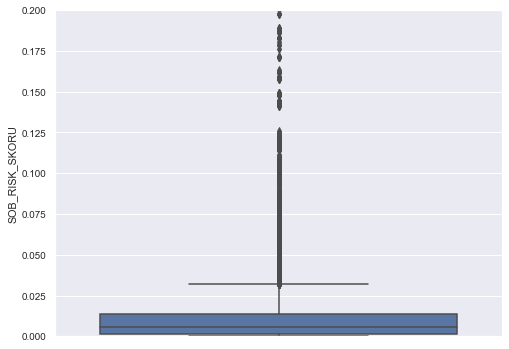

In [216]:
cat = 'SOB_RISK_SKORU'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=cat, data=df)
fig.axis(ymin=0, ymax=0.2);

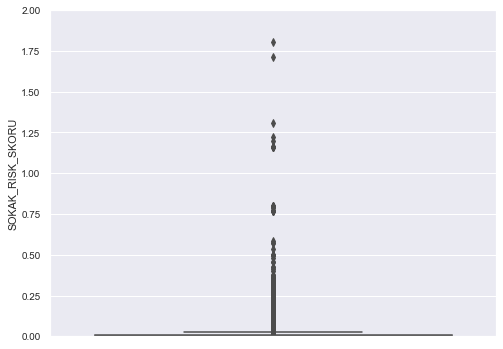

In [217]:
cat = 'SOKAK_RISK_SKORU'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=cat, data=df)
fig.axis(ymin=0, ymax=2);

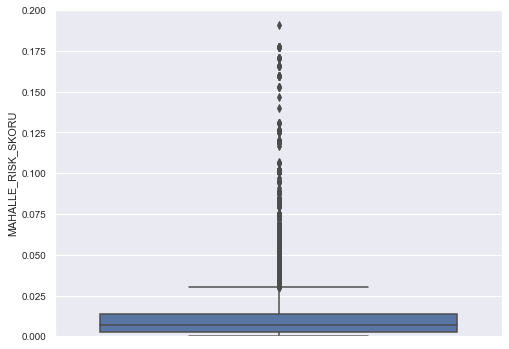

In [218]:
cat = 'MAHALLE_RISK_SKORU'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=cat, data=df)
fig.axis(ymin=0, ymax=0.2);

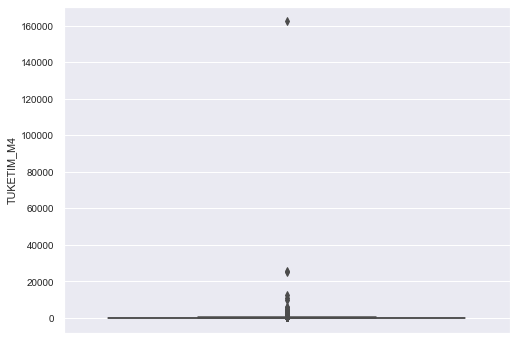

In [219]:
cat = 'TUKETIM_M4'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=cat, data=df)
#fig.axis(ymin=0, ymax=2000);

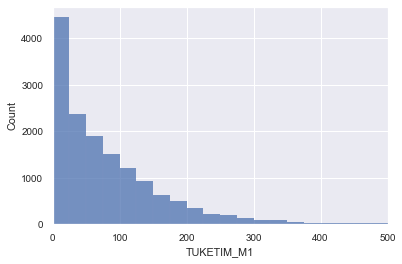

In [220]:
fig, ax = plt.subplots()
sns.histplot(binwidth=25, data=df,x="TUKETIM_M1",ax=ax)
ax.set_xlim(0,500)
#ax.set_ylim(0,1000)
plt.show()

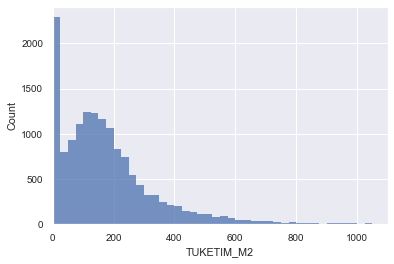

In [182]:
fig, ax = plt.subplots()
sns.histplot(binwidth=25,data=df,x="TUKETIM_M2",ax=ax)
ax.set_xlim(0,1100)
#ax.set_ylim(0,1000)
plt.show()

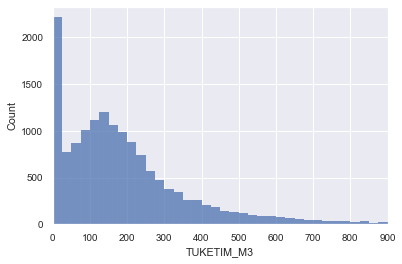

In [187]:
fig, ax = plt.subplots()
sns.histplot(binwidth=25,data=df,x="TUKETIM_M3",ax=ax)
ax.set_xlim(0,900)
#ax.set_ylim(0,1000)
plt.show()

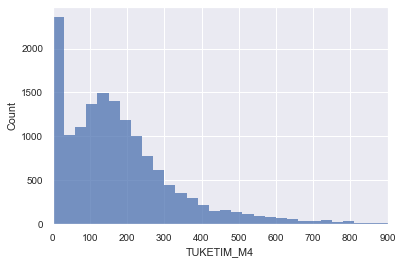

In [188]:
fig, ax = plt.subplots()
sns.histplot(binwidth=30,data=df,x="TUKETIM_M4",ax=ax)
ax.set_xlim(0,900)
#ax.set_ylim(0,1000)
plt.show()

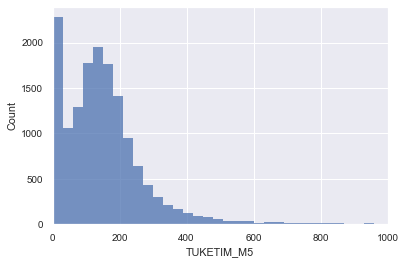

In [94]:
fig, ax = plt.subplots()
sns.histplot(binwidth=30,data=df,x="TUKETIM_M5",ax=ax)
ax.set_xlim(0,1000)
#ax.set_ylim(0,1000)
plt.show()

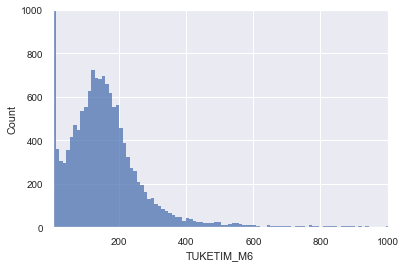

In [179]:
fig, ax = plt.subplots()
sns.histplot(data=df,x="TUKETIM_M6",ax=ax)
ax.set_xlim(1,1000)
ax.set_ylim(0,1000)
plt.show()

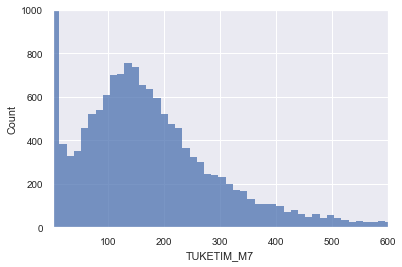

In [56]:
fig, ax = plt.subplots()
sns.histplot(data=df,x="TUKETIM_M7",ax=ax)
ax.set_xlim(1,600)
ax.set_ylim(0,1000)
plt.show()

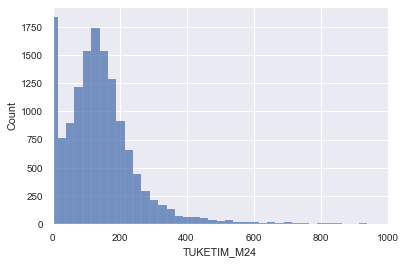

In [192]:
fig, ax = plt.subplots()
sns.histplot(binwidth=25,data=df,x="TUKETIM_M24",ax=ax)
ax.set_xlim(0,1000)
#ax.set_ylim(0,1000)
plt.show()

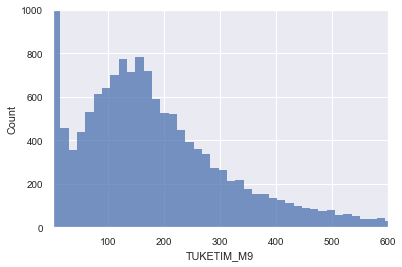

In [58]:
fig, ax = plt.subplots()
sns.histplot(data=df,x="TUKETIM_M9",ax=ax)
ax.set_xlim(1,600)
ax.set_ylim(0,1000)
plt.show()

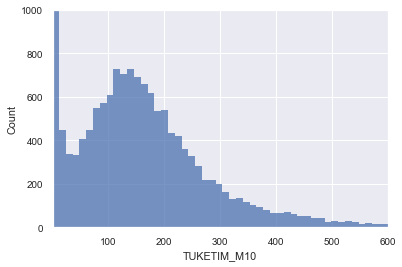

In [59]:
fig, ax = plt.subplots()
sns.histplot(data=df,x="TUKETIM_M10",ax=ax)
ax.set_xlim(1,600)
ax.set_ylim(0,1000)
plt.show()

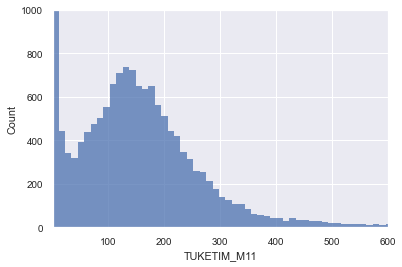

In [60]:
fig, ax = plt.subplots()
sns.histplot(data=df,x="TUKETIM_M11",ax=ax)
ax.set_xlim(1,600)
ax.set_ylim(0,1000)
plt.show()

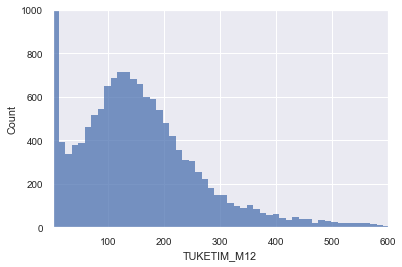

In [61]:
fig, ax = plt.subplots()
sns.histplot(data=df,x="TUKETIM_M13",ax=ax)
ax.set_xlim(1,600)
ax.set_ylim(0,1000)
plt.show()

demand_m1-demand_4,(xlim=9, bindwidth=0.4)

demand_m6-demand_m9,xlim=7,bindwidth=0.4)

demand_m7-demand_m8,(xlim=7.5, bindwidth=0.4)

demand_m2-demand_3,(xlim=9,bindwidth=0.55)

demand_m5-demand_m10-demand_m11,(xlim=8, bindwidth=0.5)

demand_12(xlim=9, bindwidth=0.5)


tüketim_m1,(bindwidth=25)(300)

tüketim_m2-tüketim_m10,(bindwidth=25)(600) && tüketim_m13-tüketim_m14-tüketim_m19(bindwidth=25)(600)

tüketim_m3-tüketim_m9-tüketim_m15-tüketim_m21, && tüketim_m8-tüketim_m20,(bindwidth=25)(700)

tüketim_m4-tüketim_m7-tüketim_m16,(bindwidth=30)(650)

tüketim_m5-tüketim_m6-tüketim_m11-tüketim_m12-tüketim_m17-tüketim_m18-tüketim_m22,(bindwidth=30)(500)





tüketim_m23,(bindwidth=25)(500)

tüketim_m24,(bindwidth=25)(500)

In [223]:
sayac_df = pd.DataFrame(df.SAYAC_YAPIM_YILI.unique(), columns = ["SAYAC_YAPIM_YILI"])
for year in df.SAYAC_YAPIM_YILI.unique():
  sayac_df.loc[sayac_df.SAYAC_YAPIM_YILI == year, ["kacak_oranı"]] = df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"].sum() / len(df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"]) * 100
  sayac_df.loc[sayac_df.SAYAC_YAPIM_YILI == year, ["sayac_sayisi"]] = len(df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"])
sayac_df.sort_values("kacak_oranı", ascending = False)

<ipython-input-223-74b1389bf939>:3: RuntimeWarning:

invalid value encountered in double_scalars



SAYAC_YAPIM_YILI  kacak_oranı  sayac_sayisi
5             2019.0    27.096774         930.0
6             2018.0    22.183709         577.0
10            2020.0    19.230769         104.0
3             2017.0    11.130435        2300.0
2             2016.0     4.316547        3336.0
1             2015.0     3.424179        1431.0
7             2014.0     2.889035        1523.0
4             2013.0     2.510760        1394.0
0             2012.0     2.294854        1438.0
9             2011.0     2.132521        1313.0
8             2010.0     2.010050         597.0
12            2007.0     0.000000           2.0
13            2008.0     0.000000           2.0
14            2009.0     0.000000           3.0
11               NaN          NaN           NaN

In [19]:
bin_labels = ['0-25', '25-50', '50-75', '75-100','100-125', '125-150','150-175', '175-200','200-225', '225-250','250-275', '275-300','300-üzeri']
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 10000000]
df['TUKETIM_M1_group'] = pd.cut(df['TUKETIM_M1'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M1",'TUKETIM_M1_group']].sort_values("TUKETIM_M1", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M1",'TUKETIM_M1_group']]

TUKETIM_M1 TUKETIM_M1_group
0       54.067286            50-75
1      125.413387          125-150
2      308.273107        300-üzeri
3       23.105143             0-25
4       36.016793            25-50
...           ...              ...
14995   48.759310            25-50
14996   22.899931             0-25
14997   35.103419            25-50
14998    1.191094             0-25
14999    1.801000             0-25

[15000 rows x 2 columns]

In [21]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 10000000]
df['TUKETIM_M2_group'] = pd.cut(df['TUKETIM_M2'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M2",'TUKETIM_M2_group']].sort_values("TUKETIM_M2", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M2",'TUKETIM_M2_group']]

TUKETIM_M2 TUKETIM_M2_group
0      260.483048          250-275
1      227.864889          225-250
2      386.164464          375-400
3       49.197286            25-50
4       48.795995            25-50
...           ...              ...
14995  242.282118          225-250
14996  221.434843          200-225
14997  146.619759          125-150
14998    6.105906             0-25
14999  148.223138          125-150

[15000 rows x 2 columns]

In [22]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 10000000]
df['TUKETIM_M3_group'] = pd.cut(df['TUKETIM_M3'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M3",'TUKETIM_M3_group']].sort_values("TUKETIM_M3", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M3",'TUKETIM_M3_group']]

TUKETIM_M3 TUKETIM_M3_group
0      275.618048          275-300
1      253.651891          250-275
2      392.016065          375-400
3       64.653696            50-75
4       50.209868            50-75
...           ...              ...
14995  305.187862          300-325
14996  237.899774          225-250
14997  172.015377          150-175
14998   10.661600             0-25
14999  787.930217        700-üzeri

[15000 rows x 2 columns]

In [24]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-540', '540-570', '570-600',
              '600-630', '630-660', 
              '660-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 540, 570, 600,
        630, 660, 10000000]
df['TUKETIM_M4_group'] = pd.cut(df['TUKETIM_M4'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M4",'TUKETIM_M4_group']].sort_values("TUKETIM_M4", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M4",'TUKETIM_M4_group']]

TUKETIM_M4 TUKETIM_M4_group
0      273.467499          270-300
1      230.289027          210-240
2      238.200398          210-240
3       73.807875            60-90
4       50.969201            30-60
...           ...              ...
14995  364.041376          360-390
14996  237.992259          210-240
14997  198.324000          180-210
14998    6.234114             0-30
14999  997.626435        660-üzeri

[15000 rows x 2 columns]

In [25]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M5_group'] = pd.cut(df['TUKETIM_M5'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M5",'TUKETIM_M5_group']].sort_values("TUKETIM_M5", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M5",'TUKETIM_M5_group']]

TUKETIM_M5 TUKETIM_M5_group
0      281.655063          270-300
1      241.382306          240-270
2      163.968966          150-180
3       31.418710            30-60
4       49.746943            30-60
...           ...              ...
14995  335.741105          330-360
14996  193.459992          180-210
14997  180.250033          180-210
14998   16.302857             0-30
14999  544.624782        510-üzeri

[15000 rows x 2 columns]

In [26]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M6_group'] = pd.cut(df['TUKETIM_M6'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M6",'TUKETIM_M5_group']].sort_values("TUKETIM_M6", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M6",'TUKETIM_M6_group']]

TUKETIM_M6 TUKETIM_M6_group
0      352.713057          330-360
1      248.334700          240-270
2      162.782897          150-180
3       31.834563            30-60
4       89.461700            60-90
...           ...              ...
14995  270.324229          270-300
14996  230.845648          210-240
14997  140.946512          120-150
14998   16.211857             0-30
14999  665.953845        510-üzeri

[15000 rows x 2 columns]

In [27]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-540', '540-570', '570-600',
              '600-630', '630-660', 
              '660-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 540, 570, 600,
        630, 660, 10000000]
df['TUKETIM_M7_group'] = pd.cut(df['TUKETIM_M7'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M7",'TUKETIM_M7_group']].sort_values("TUKETIM_M7", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M7",'TUKETIM_M7_group']]

TUKETIM_M7 TUKETIM_M7_group
0       415.387382          390-420
1       217.821800          210-240
2       187.088937          180-210
3        24.261624             0-30
4       328.368786          300-330
...            ...              ...
14995   261.348077          240-270
14996   235.719764          210-240
14997   143.669681          120-150
14998    60.845087            60-90
14999  1158.176583        660-üzeri

[15000 rows x 2 columns]

In [30]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 10000000]
df['TUKETIM_M8_group'] = pd.cut(df['TUKETIM_M8'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M8",'TUKETIM_M8_group']].sort_values("TUKETIM_M8", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M8",'TUKETIM_M8_group']]

TUKETIM_M8 TUKETIM_M8_group
0       506.970118          500-525
1       249.203886          225-250
2       212.920402          200-225
3        27.079161            25-50
4       469.163521          450-475
...            ...              ...
14995   379.654869          375-400
14996   335.931917          325-350
14997   152.438057          150-175
14998   114.472218          100-125
14999  1427.174758        700-üzeri

[15000 rows x 2 columns]

In [31]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 10000000]
df['TUKETIM_M9_group'] = pd.cut(df['TUKETIM_M9'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M9",'TUKETIM_M9_group']].sort_values("TUKETIM_M9", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M9",'TUKETIM_M9_group']]

TUKETIM_M9 TUKETIM_M9_group
0       536.242000          525-550
1       246.356225          225-250
2       204.618086          200-225
3        26.952110            25-50
4       432.848994          425-450
...            ...              ...
14995   421.752054          400-425
14996   318.189711          300-325
14997   151.259252          150-175
14998    16.684195             0-25
14999  1262.936199        700-üzeri

[15000 rows x 2 columns]

In [32]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 10000000]
df['TUKETIM_M10_group'] = pd.cut(df['TUKETIM_M10'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M10",'TUKETIM_M10_group']].sort_values("TUKETIM_M10", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M10",'TUKETIM_M10_group']]

TUKETIM_M10 TUKETIM_M10_group
0       497.518271           475-500
1       203.709124           200-225
2       181.509614           175-200
3        32.072690             25-50
4       461.588897           450-475
...            ...               ...
14995   302.090882           300-325
14996   201.489560           200-225
14997   164.891766           150-175
14998     0.895071              0-25
14999   846.928301         600-üzeri

[15000 rows x 2 columns]

In [33]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M11_group'] = pd.cut(df['TUKETIM_M11'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M11",'TUKETIM_M11_group']].sort_values("TUKETIM_M11", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M11",'TUKETIM_M11_group']]

TUKETIM_M11 TUKETIM_M11_group
0       471.083198           450-480
1       204.614265           180-210
2       162.532761           150-180
3        24.478705              0-30
4       606.119366         510-üzeri
...            ...               ...
14995   273.313588           270-300
14996   201.669535           180-210
14997   196.961084           180-210
14998     1.372600              0-30
14999   616.413457         510-üzeri

[15000 rows x 2 columns]

In [35]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M12_group'] = pd.cut(df['TUKETIM_M12'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M12",'TUKETIM_M12_group']].sort_values("TUKETIM_M12", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M12",'TUKETIM_M12_group']]

TUKETIM_M12 TUKETIM_M12_group
0       315.163173           300-330
1       227.282016           210-240
2       180.364045           180-210
3        42.151289             30-60
4       688.857188         510-üzeri
...            ...               ...
14995   271.481729           270-300
14996   174.729651           150-180
14997   175.498736           150-180
14998     0.211366              0-30
14999   446.119320           420-450

[15000 rows x 2 columns]

In [36]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 10000000]
df['TUKETIM_M13_group'] = pd.cut(df['TUKETIM_M13'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M13",'TUKETIM_M13_group']].sort_values("TUKETIM_M13", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M13",'TUKETIM_M13_group']]

TUKETIM_M13 TUKETIM_M13_group
0       315.871357           300-325
1       252.688863           250-275
2       200.545258           200-225
3        51.868976             50-75
4       728.733365         600-üzeri
...            ...               ...
14995   416.236948           400-425
14996   215.123833           200-225
14997   176.433015           175-200
14998     0.050284              0-25
14999   562.406151           550-575

[15000 rows x 2 columns]

In [37]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 10000000]
df['TUKETIM_M14_group'] = pd.cut(df['TUKETIM_M14'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M14",'TUKETIM_M14_group']].sort_values("TUKETIM_M14", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M14",'TUKETIM_M14_group']]

TUKETIM_M14 TUKETIM_M14_group
0       274.376412           250-275
1       234.528121           225-250
2       177.086519           175-200
3        55.239458             50-75
4       509.289004           500-525
...            ...               ...
14995   532.104741           525-550
14996   298.093514           275-300
14997   152.258558           150-175
14998     0.048883              0-25
14999   680.873912         600-üzeri

[15000 rows x 2 columns]

In [38]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 10000000]
df['TUKETIM_M15_group'] = pd.cut(df['TUKETIM_M15'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M15",'TUKETIM_M15_group']].sort_values("TUKETIM_M15", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M15",'TUKETIM_M15_group']]

TUKETIM_M15 TUKETIM_M15_group
0       300.337088           300-325
1       290.624533           275-300
2       193.950044           175-200
3       108.295683           100-125
4       532.276781           525-550
...            ...               ...
14995   610.505111           600-625
14996   423.104067           400-425
14997   176.394972           175-200
14998     0.053010              0-25
14999   884.428760         700-üzeri

[15000 rows x 2 columns]